In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib.pyplot as plt 

In [16]:
model = LogisticRegression() 

In [17]:
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [46]:
df['male'] = [1 if i == 'male' else 0 for i in df['person_gender']]
df['female'] = [1 if i == 'female' else 0 for i in df['person_gender']]
df.drop(columns=['person_gender'],inplace=True)
df.head()

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,male,female
0,22.0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,0,1
1,21.0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0,1
2,25.0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,0,1
3,23.0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,0,1
4,24.0,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,1,0


In [47]:
print(df['loan_intent'].unique())
print(df['person_education'].unique())
print(df['person_home_ownership'].unique())

['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
['RENT' 'OWN' 'MORTGAGE' 'OTHER']


In [51]:
df['RENT'] = [1 if i=='RENT' else 0 for i in df['person_home_ownership']]
df['OWN'] = [1 if i=='OWN' else 0 for i in df['person_home_ownership']]
df['MORTAGE'] = [1 if i=='MORTAGE' else 0 for i in df['person_home_ownership']] 
df['OTHER'] = [1 if i=='OTHER' else 0 for i in df['person_home_ownership']]
df.drop(columns=['person_home_ownership'],inplace=True)
df.head()

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,male,female,RENT,OWN,MORTAGE,OTHER
0,22.0,Master,71948.0,0,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,0,1,1,0,0,0
1,21.0,High School,12282.0,0,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0,1,0,1,0,0
2,25.0,High School,12438.0,3,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,0,1,0,0,0,0
3,23.0,Bachelor,79753.0,0,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,0,1,1,0,0,0
4,24.0,Master,66135.0,1,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,1,0,1,0,0,0


In [52]:
df['Master'] = [1 if i=='Master' else 0 for i in df['person_education']]
df['High School'] = [1 if i=='High School' else 0 for i in df['person_education']]
df['Bachelor'] = [1 if i=='Bachelor' else 0 for i in df['person_education']] 
df['Associate'] = [1 if i=='Associate' else 0 for i in df['person_education']]
df['Doctorate'] = [1 if i=='Doctorate' else 0 for i in df['person_education']]
df.drop(columns=['person_education'],inplace=True)
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,female,RENT,OWN,MORTAGE,OTHER,Master,High School,Bachelor,Associate,Doctorate
0,22.0,71948.0,0,35000.0,PERSONAL,16.02,0.49,3.0,561,No,...,1,1,0,0,0,1,0,0,0,0
1,21.0,12282.0,0,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,...,1,0,1,0,0,0,1,0,0,0
2,25.0,12438.0,3,5500.0,MEDICAL,12.87,0.44,3.0,635,No,...,1,0,0,0,0,0,1,0,0,0
3,23.0,79753.0,0,35000.0,MEDICAL,15.23,0.44,2.0,675,No,...,1,1,0,0,0,0,0,1,0,0
4,24.0,66135.0,1,35000.0,MEDICAL,14.27,0.53,4.0,586,No,...,0,1,0,0,0,1,0,0,0,0


In [53]:
df['PERSONAL'] = [1 if i=='PERSONAL' else 0 for i in df['loan_intent']]
df['EDUCATION'] = [1 if i=='EDUCATION' else 0 for i in df['loan_intent']]
df['MEDICAL'] = [1 if i=='MEDICAL' else 0 for i in df['loan_intent']] 
df['VENTURE'] = [1 if i=='VENTURE' else 0 for i in df['loan_intent']]
df['HOMEIMPROVEMENT'] = [1 if i=='HOMEIMPROVEMENT' else 0 for i in df['loan_intent']]
df['DEBTCONSOLIDATION'] = [1 if i=='DEBTCONSOLIDATION' else 0 for i in df['loan_intent']]
df.drop(columns=['loan_intent'],inplace=True)
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,High School,Bachelor,Associate,Doctorate,PERSONAL,EDUCATION,MEDICAL,VENTURE,HOMEIMPROVEMENT,DEBTCONSOLIDATION
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,No,1,...,0,0,0,0,1,0,0,0,0,0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,Yes,0,...,1,0,0,0,0,1,0,0,0,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,No,1,...,1,0,0,0,0,0,1,0,0,0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,No,1,...,0,1,0,0,0,0,1,0,0,0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,No,1,...,0,0,0,0,0,0,1,0,0,0


In [54]:
df.columns

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status', 'male',
       'female', 'RENT', 'OWN', 'MORTAGE', 'OTHER', 'Master', 'High School',
       'Bachelor', 'Associate', 'Doctorate', 'PERSONAL', 'EDUCATION',
       'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION'],
      dtype='object')

In [67]:
x = df[['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'male',
       'female', 'RENT', 'OWN', 'MORTAGE', 'OTHER', 'Master', 'High School',
       'Bachelor', 'Associate', 'Doctorate', 'PERSONAL', 'EDUCATION',
       'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION']].copy()
x

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,male,...,High School,Bachelor,Associate,Doctorate,PERSONAL,EDUCATION,MEDICAL,VENTURE,HOMEIMPROVEMENT,DEBTCONSOLIDATION
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,No,0,...,0,0,0,0,1,0,0,0,0,0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,Yes,0,...,1,0,0,0,0,1,0,0,0,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,No,0,...,1,0,0,0,0,0,1,0,0,0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,No,0,...,0,1,0,0,0,0,1,0,0,0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,No,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,No,1,...,0,0,1,0,0,0,1,0,0,0
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,No,0,...,0,0,1,0,0,0,0,0,1,0
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,No,1,...,0,0,1,0,0,0,0,0,0,1
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,No,1,...,0,1,0,0,0,1,0,0,0,0


In [68]:
y = df['loan_status']
y

0        1
1        0
2        1
3        1
4        1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: loan_status, Length: 45000, dtype: int64

In [77]:
x['loan_amnt'] = x['loan_amnt'].astype('int64')
x['person_age'] = x['person_age'].astype('int16')
x['person_income'] = x['person_income'].astype('int64') 
x['cb_person_cred_hist_length'] = x['cb_person_cred_hist_length'].astype('int32')

In [78]:
x['previous_loan_defaults_on_file'] = [1 if i=='Yes' else 0 for i in df['previous_loan_defaults_on_file']]

In [79]:
x

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,male,...,High School,Bachelor,Associate,Doctorate,PERSONAL,EDUCATION,MEDICAL,VENTURE,HOMEIMPROVEMENT,DEBTCONSOLIDATION
0,22,71948,0,35000,16.02,0.49,3,561,0,0,...,0,0,0,0,1,0,0,0,0,0
1,21,12282,0,1000,11.14,0.08,2,504,1,0,...,1,0,0,0,0,1,0,0,0,0
2,25,12438,3,5500,12.87,0.44,3,635,0,0,...,1,0,0,0,0,0,1,0,0,0
3,23,79753,0,35000,15.23,0.44,2,675,0,0,...,0,1,0,0,0,0,1,0,0,0
4,24,66135,1,35000,14.27,0.53,4,586,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,47971,6,15000,15.66,0.31,3,645,0,1,...,0,0,1,0,0,0,1,0,0,0
44996,37,65800,17,9000,14.07,0.14,11,621,0,0,...,0,0,1,0,0,0,0,0,1,0
44997,33,56942,7,2771,10.02,0.05,10,668,0,1,...,0,0,1,0,0,0,0,0,0,1
44998,29,33164,4,12000,13.23,0.36,6,604,0,1,...,0,1,0,0,0,1,0,0,0,0


In [80]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int16  
 1   person_income                   45000 non-null  int64  
 2   person_emp_exp                  45000 non-null  int64  
 3   loan_amnt                       45000 non-null  int64  
 4   loan_int_rate                   45000 non-null  float64
 5   loan_percent_income             45000 non-null  float64
 6   cb_person_cred_hist_length      45000 non-null  int32  
 7   credit_score                    45000 non-null  int64  
 8   previous_loan_defaults_on_file  45000 non-null  int64  
 9   male                            45000 non-null  int64  
 10  female                          45000 non-null  int64  
 11  RENT                            45000 non-null  int64  
 12  OWN                             

In [81]:
binary_columns = [
    'previous_loan_defaults_on_file',
    'male', 'female',
    'RENT', 'OWN', 'MORTAGE', 'OTHER',
    'Master', 'High School', 'Bachelor', 'Associate', 'Doctorate',
    'PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION'
]
x[binary_columns] = x[binary_columns].astype(bool)


In [82]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int16  
 1   person_income                   45000 non-null  int64  
 2   person_emp_exp                  45000 non-null  int64  
 3   loan_amnt                       45000 non-null  int64  
 4   loan_int_rate                   45000 non-null  float64
 5   loan_percent_income             45000 non-null  float64
 6   cb_person_cred_hist_length      45000 non-null  int32  
 7   credit_score                    45000 non-null  int64  
 8   previous_loan_defaults_on_file  45000 non-null  bool   
 9   male                            45000 non-null  bool   
 10  female                          45000 non-null  bool   
 11  RENT                            45000 non-null  bool   
 12  OWN                             

In [83]:
x

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,male,...,High School,Bachelor,Associate,Doctorate,PERSONAL,EDUCATION,MEDICAL,VENTURE,HOMEIMPROVEMENT,DEBTCONSOLIDATION
0,22,71948,0,35000,16.02,0.49,3,561,False,False,...,False,False,False,False,True,False,False,False,False,False
1,21,12282,0,1000,11.14,0.08,2,504,True,False,...,True,False,False,False,False,True,False,False,False,False
2,25,12438,3,5500,12.87,0.44,3,635,False,False,...,True,False,False,False,False,False,True,False,False,False
3,23,79753,0,35000,15.23,0.44,2,675,False,False,...,False,True,False,False,False,False,True,False,False,False
4,24,66135,1,35000,14.27,0.53,4,586,False,True,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,47971,6,15000,15.66,0.31,3,645,False,True,...,False,False,True,False,False,False,True,False,False,False
44996,37,65800,17,9000,14.07,0.14,11,621,False,False,...,False,False,True,False,False,False,False,False,True,False
44997,33,56942,7,2771,10.02,0.05,10,668,False,True,...,False,False,True,False,False,False,False,False,False,True
44998,29,33164,4,12000,13.23,0.36,6,604,False,True,...,False,True,False,False,False,True,False,False,False,False


In [84]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [85]:
X_train.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,male,...,High School,Bachelor,Associate,Doctorate,PERSONAL,EDUCATION,MEDICAL,VENTURE,HOMEIMPROVEMENT,DEBTCONSOLIDATION
16705,24,144887,3,16000,9.63,0.11,2,643,False,True,...,False,False,True,False,True,False,False,False,False,False
542,24,79138,2,21250,15.95,0.27,4,650,False,False,...,False,False,True,False,False,True,False,False,False,False
18179,33,20031,9,6000,7.14,0.30,5,524,False,True,...,False,False,True,False,False,False,True,False,False,False
24491,27,67596,1,10000,6.54,0.15,10,662,True,False,...,False,False,True,False,False,False,False,False,False,True
9901,25,48281,6,9000,15.23,0.19,4,613,False,False,...,False,False,True,False,False,False,False,True,False,False


In [86]:
Y_train.head()

16705    0
542      1
18179    1
24491    0
9901     1
Name: loan_status, dtype: int64

In [87]:
X_test.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,male,...,High School,Bachelor,Associate,Doctorate,PERSONAL,EDUCATION,MEDICAL,VENTURE,HOMEIMPROVEMENT,DEBTCONSOLIDATION
585,23,25168,0,6400,10.65,0.25,4,638,False,True,...,False,False,True,False,False,False,True,False,False,False
35269,35,120910,9,3000,8.36,0.02,10,560,False,True,...,False,True,False,False,False,False,False,False,False,True
44340,24,26772,1,6613,12.48,0.25,4,641,False,False,...,True,False,False,False,False,True,False,False,False,False
19122,30,22922,12,2400,11.49,0.10,10,630,False,False,...,True,False,False,False,False,True,False,False,False,False
14082,26,109124,1,14000,6.03,0.13,2,596,True,False,...,False,False,True,False,False,False,False,False,True,False


In [90]:
Y_test.head()

585      0
35269    0
44340    1
19122    0
14082    0
Name: loan_status, dtype: int64

In [91]:
model.fit(X_train,Y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [97]:
model.fit(X_scaled, Y_train)

LogisticRegression()

In [100]:
Y_pred = model.predict(X_test)
Y_pred

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 1, 0, ..., 0, 0, 0], shape=(9000,))

In [102]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6443


In [124]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.97      0.83      0.89      7054
           1       0.59      0.91      0.72      1946

    accuracy                           0.84      9000
   macro avg       0.78      0.87      0.81      9000
weighted avg       0.89      0.84      0.85      9000



In [114]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, Y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [117]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8447


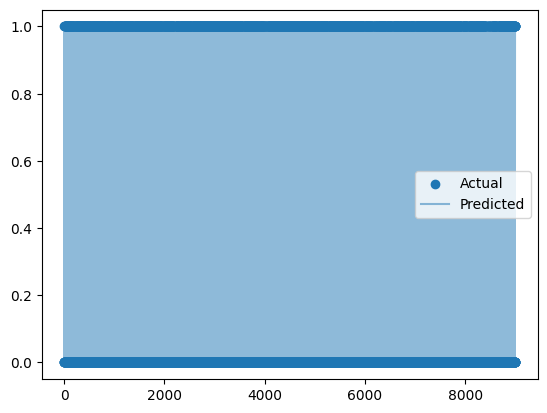

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      7054
           1       0.59      0.91      0.72      1946

    accuracy                           0.84      9000
   macro avg       0.78      0.87      0.81      9000
weighted avg       0.89      0.84      0.85      9000



In [126]:
predictions = model.predict(X_test)
plt.scatter(range(len(Y_test)), Y_test, label='Actual')
plt.plot(range(len(predictions)), predictions, label='Predicted', alpha=0.5)
plt.legend()
plt.show()

print(classification_report(Y_test, Y_pred))